In [1]:
import os
os.chdir(r'C:\Udemy - Machine Learning\Machine Learning A-Z Template Folder\Part 6 - Reinforcement Learning\Section 31 - Upper Confidence Bound (UCB)\Python')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log,sqrt

In [3]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
N=10000
d=10
ads_selected=[]
numbers_of_selection=[0]*d
sums_of_reward=[0]*d
total_reward=[0]*d

In [5]:
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(numbers_of_selection[i]>0):
            average_reward=sums_of_reward[i]/numbers_of_selection[i]
            delta_i=sqrt(3/2 * log(n+1)/numbers_of_selection[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selection[ad]=numbers_of_selection[ad]+1
    reward=dataset.values[n,ad]
    sums_of_reward[ad]=sums_of_reward[ad]+reward
    total_reward=total_reward+reward

In [6]:
numbers_of_selection

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

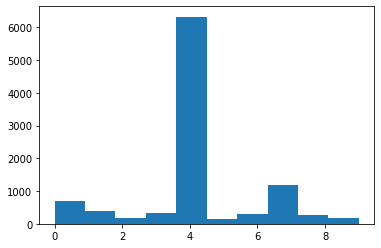

In [9]:
plt.hist(ads_selected)
plt.title='Histogram of ads selection'
plt.xlabel='Ads'
plt.ylabel='Number of times ad was selected'
plt.show()